<a href="https://colab.research.google.com/github/divya374r1/Neural-Network-and-Deep-Learning/blob/main/Neural_Network_for_handwritten_digit_recognition_using_the_MNIST_dataset_(Convolutional_Neural_Network(CNN)MODEL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9087 - loss: 0.2998 - val_accuracy: 0.9854 - val_loss: 0.0437
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9858 - loss: 0.0443 - val_accuracy: 0.9869 - val_loss: 0.0378
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9906 - loss: 0.0296 - val_accuracy: 0.9877 - val_loss: 0.0363
Enter a digit (0–9): 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


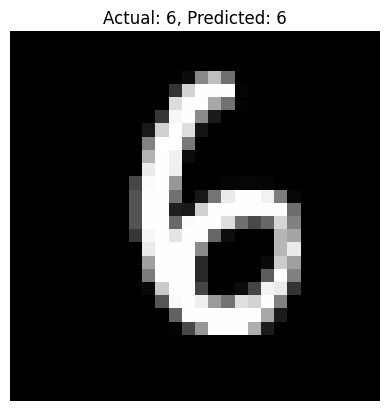

Predicted Digit: 6


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress specific Keras UserWarnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.layers.convolutional.base_conv')

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Ask user for a digit
user_digit = int(input("Enter a digit (0–9): "))# Pick a random test image of that digit
indices = np.where(y_test == user_digit)[0]
random_index = np.random.choice(indices)
test_image = x_test[random_index]

# Predict
prediction = model.predict(test_image.reshape(1,28,28,1))
predicted_digit = np.argmax(prediction)

# Show result
plt.imshow(test_image.reshape(28,28), cmap="gray")
plt.title(f"Actual: {user_digit}, Predicted: {predicted_digit}")
plt.axis("off")
plt.show()

print("Predicted Digit:", predicted_digit)